# SuperStore Sales

In [1]:
# Sales Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv('SuperStore_Orders.csv', encoding='ISO-8859-1', sep=',')
dataset

df = pd.DataFrame(dataset)
df

order_id  order_date   ship_date       ship_mode  \
0         AG-2011-2040  01-01-2011  06-01-2011  Standard Class   
1        IN-2011-47883  01-01-2011  08-01-2011  Standard Class   
2         HU-2011-1220  01-01-2011  05-01-2011    Second Class   
3      IT-2011-3647632  01-01-2011  05-01-2011    Second Class   
4        IN-2011-47883  01-01-2011  08-01-2011  Standard Class   
...                ...         ...         ...             ...   
51285   CA-2014-115427  31-12-2014  04-01-2015  Standard Class   
51286     MO-2014-2560  31-12-2014  05-01-2015  Standard Class   
51287   MX-2014-110527  31-12-2014  02-01-2015    Second Class   
51288   MX-2014-114783  31-12-2014  06-01-2015  Standard Class   
51289   CA-2014-156720  31-12-2014  04-01-2015  Standard Class   

          customer_name      segment             state        country  market  \
0       Toby Braunhardt     Consumer       Constantine        Algeria  Africa   
1           Joseph Holt     Consumer   New South Wales      Australia    APAC   
2         Annie Thurman     Consumer          Budapest        Hungary    EMEA   
3          Eugene Moren  Home Office         Stockholm         Sweden      EU   
4           Joseph Holt     Consumer   New South Wales      Australia    APAC   
...                 ...          ...               ...            ...     ...   
51285        Erica Bern    Corporate        California  United States      US   
51286         Liz Preis     Consumer  Souss-Massa-Draâ        Morocco  Africa   
51287  Charlotte Melton     Consumer           Managua      Nicaragua   LATAM   
51288     Tamara Dahlen     Consumer         Chihuahua         Mexico   LATAM   
51289     Jill Matthias     Consumer          Colorado  United States      US   

        region  ...         category sub_category  \
0       Africa  ...  Office Supplies      Storage   
1      Oceania  ...  Office Supplies     Supplies   
2         EMEA  ...  Office Supplies      Storage   
3        North  ...  Office Supplies        Paper   
4      Oceania  ...        Furniture  Furnishings   
...        ...  ...              ...          ...   
51285     West  ...  Office Supplies      Binders   
51286   Africa  ...  Office Supplies      Binders   
51287  Central  ...  Office Supplies       Labels   
51288    North  ...  Office Supplies       Labels   
51289     West  ...  Office Supplies    Fasteners   

                                          product_name sales quantity  \
0                                  Tenex Lockers, Blue   408        2   
1                             Acme Trimmer, High Speed   120        3   
2                              Tenex Box, Single Width    66        4   
3                          Enermax Note Cards, Premium    45        3   
4                           Eldon Light Bulb, Duo Pack   114        5   
...                                                ...   ...      ...   
51285  Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl    14        2   
51286          Wilson Jones Hole Reinforcements, Clear     4        1   
51287           Hon Color Coded Labels, 5000 Label Set    26        3   
51288           Hon Legal Exhibit Labels, Alphabetical     7        1   
51289                              Bagged Rubber Bands     3        3   

       discount    profit  shipping_cost  order_priority  year  
0           0.0  106.1400          35.46          Medium  2011  
1           0.1   36.0360           9.72          Medium  2011  
2           0.0   29.6400           8.17            High  2011  
3           0.5  -26.0550           4.82            High  2011  
4           0.1   37.7700           4.70          Medium  2011  
...         ...       ...            ...             ...   ...  
51285       0.2    4.5188           0.89          Medium  2014  
51286       0.0    0.4200           0.49          Medium  2014  
51287       0.0   12.3600           0.35          Medium  2014  
51288       0.0    0.5600           0.20          Medium  2014  
51289       0.2   -

In [19]:
df.isna().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [44]:
# Hitung jumlah data per category
print(df["category"].value_counts())


category
Office Supplies    31273
Technology         10141
Furniture           9876
Name: count, dtype: int64


In [43]:
# Hitung jumlah data per sub_category
print(df["sub_category"].value_counts())


sub_category
Binders        6152
Storage        5059
Art            4883
Paper          3538
Chairs         3434
Phones         3357
Furnishings    3170
Accessories    3075
Labels         2606
Envelopes      2435
Supplies       2425
Fasteners      2420
Bookcases      2411
Copiers        2223
Appliances     1755
Machines       1486
Tables          861
Name: count, dtype: int64


In [3]:
# Hitung total pendapatan per kategori
df["sales"] = pd.to_numeric(df["sales"], errors="coerce")
total_sales = df.groupby("category")["sales"].sum().reset_index()

print("Total revenue per category:")
print(total_sales)

Total revenue per category:
          category      sales
0        Furniture  2406605.0
1  Office Supplies  2790258.0
2       Technology  2638265.0


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

category_summary = df.groupby("category").agg({
    "sales": "sum",
    "profit": "sum",
    "discount": "mean"
}).reset_index()

# --- Visualisasi Category-wise ---
fig, ax1 = plt.subplots(figsize=(10,6))

categories = category_summary["category"]
x = range(len(categories))

# Revenue & Profit sebagai bar chart
ax1.bar(x, category_summary["sales"], width=0.3, label="Revenue", align='center')
ax1.bar([i + 0.3 for i in x], category_summary["profit"], width=0.3, label="Profit", align='center')
ax1.set_xlabel("Category")
ax1.set_ylabel("Amount")
ax1.set_xticks([i + 0.15 for i in x])
ax1.set_xticklabels(categories)
ax1.legend(loc='upper left')

# Discount sebagai line plot dengan secondary axis
ax2 = ax1.twinx()
ax2.plot([i + 0.15 for i in x], category_summary["discount"], color='red', marker='o', label="Discount")
ax2.set_ylabel("Discount (%)")
ax2.legend(loc='upper right')

plt.title("Revenue, Profit & Discount by Category")
plt.show()


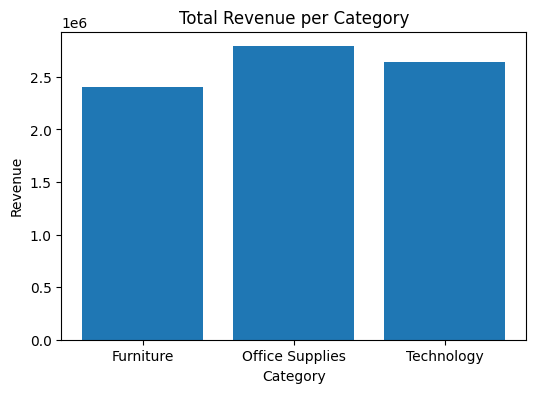

In [22]:
# Visualisasi revenue per kategori
plt.figure(figsize=(6,4))
plt.bar(total_sales["category"], total_sales["sales"])
plt.title("Total Revenue per Category")
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.show()

          category      sales        profit  discount
0        Furniture  2406605.0  286782.25380  0.168087
1  Office Supplies  2790258.0  518473.83430  0.137409
2       Technology  2638265.0  663778.73318  0.135342


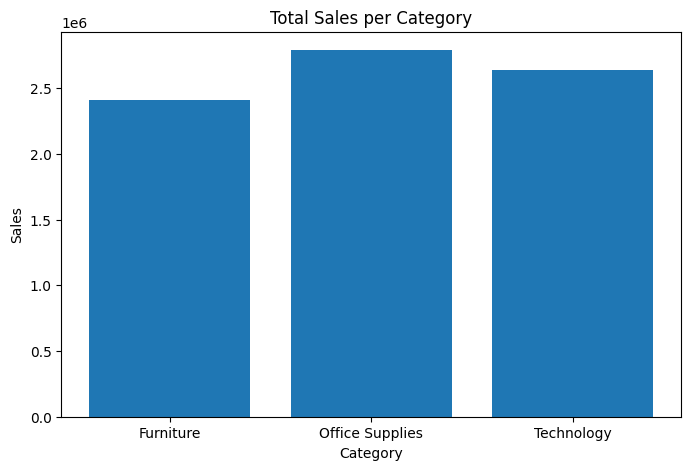

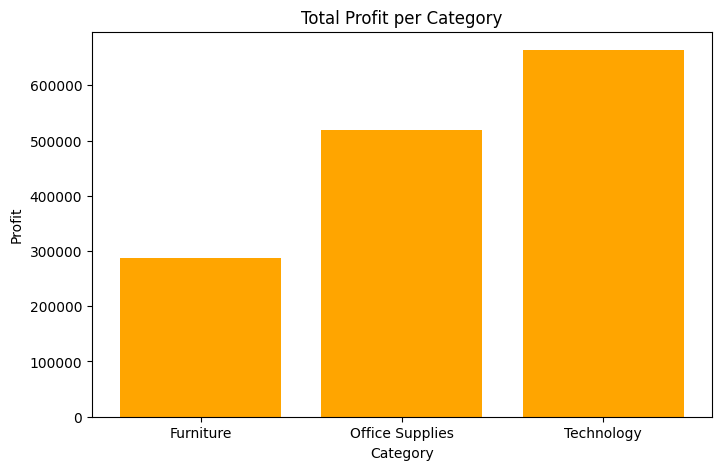

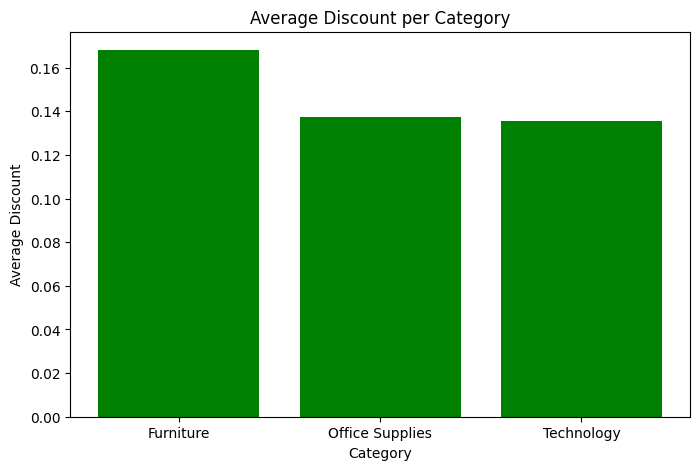

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Agregasi berdasarkan kategori
agg_category = df.groupby("category").agg({
    "sales": "sum",
    "profit": "sum",
    "discount": "mean"
}).reset_index()

print(agg_category)

# 1. Bar chart total sales per kategori
plt.figure(figsize=(8,5))
plt.bar(agg_category["category"], agg_category["sales"])
plt.title("Total Sales per Category")
plt.xlabel("Category")
plt.ylabel("Sales")
plt.show()

# 2. Bar chart profit per kategori
plt.figure(figsize=(8,5))
plt.bar(agg_category["category"], agg_category["profit"], color="orange")
plt.title("Total Profit per Category")
plt.xlabel("Category")
plt.ylabel("Profit")
plt.show()

# 3. Bar chart discount rata-rata per kategori
plt.figure(figsize=(8,5))
plt.bar(agg_category["category"], agg_category["discount"], color="green")
plt.title("Average Discount per Category")
plt.xlabel("Category")
plt.ylabel("Average Discount")
plt.show()


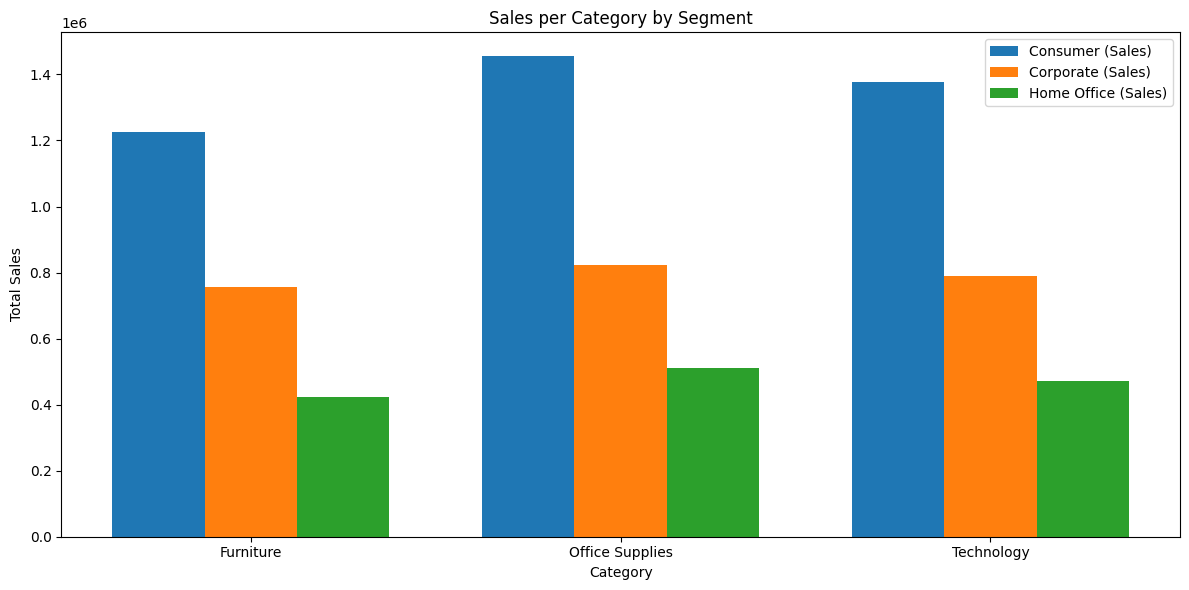

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# Agregasi kategori x segmen
summary_cat_seg = df.groupby(["category", "segment"]).agg({
    "sales": "sum",
    "profit": "sum",
    "discount": "mean"
}).reset_index()

# Tambahin profit margin
summary_cat_seg["profit_margin"] = (summary_cat_seg["profit"] / summary_cat_seg["sales"]) * 100

# Siapkan data untuk plot
categories = summary_cat_seg["category"].unique()
segments = summary_cat_seg["segment"].unique()

x = np.arange(len(categories))  # posisi kategori
width = 0.25  # lebar bar

plt.figure(figsize=(12,6))

for i, seg in enumerate(segments):
    subset = summary_cat_seg[summary_cat_seg["segment"] == seg]
    plt.bar(x + i*width,
            subset["sales"],
            width,
            label=f"{seg} (Sales)")

# Label & styling
plt.xticks(x + width, categories)
plt.title("Sales per Category by Segment")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.legend()
plt.tight_layout()
plt.show()


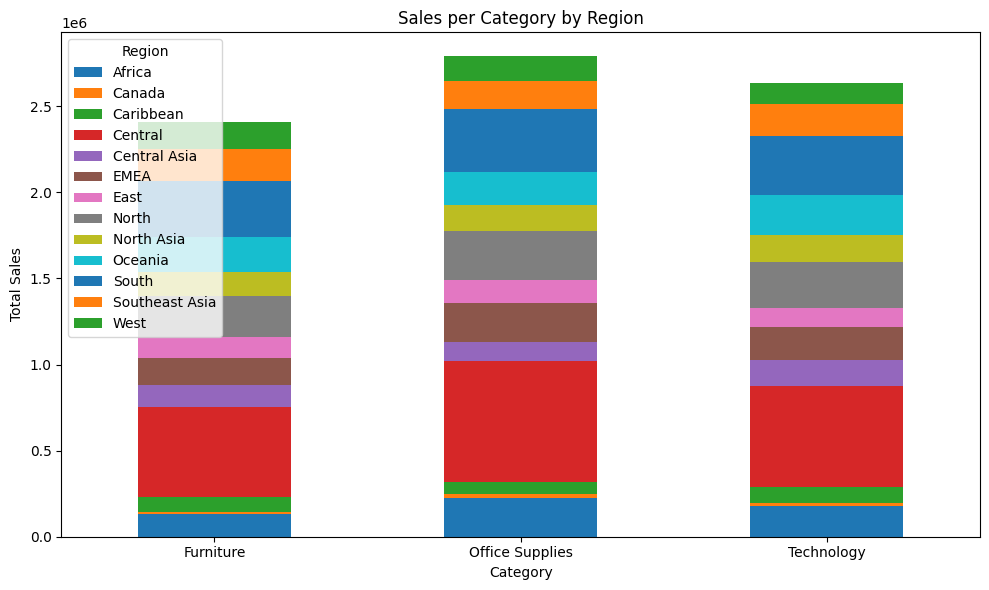

In [63]:
import matplotlib.pyplot as plt

# Pivot tabel biar gampang
pivot_cat_region = df.groupby(["category", "region"])["sales"].sum().unstack().fillna(0)

# Plot stacked bar
pivot_cat_region.plot(kind="bar", stacked=True, figsize=(10,6))

plt.title("Sales per Category by Region")
plt.ylabel("Total Sales")
plt.xlabel("Category")
plt.xticks(rotation=0)
plt.legend(title="Region")
plt.tight_layout()
plt.show()


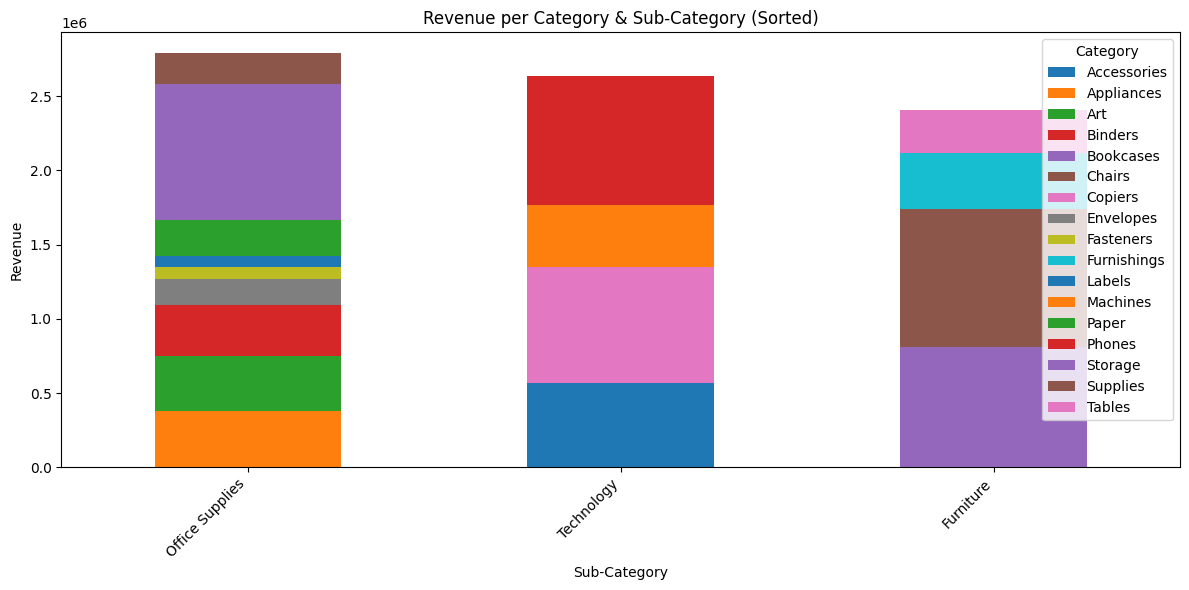

In [31]:
import matplotlib.pyplot as plt

# Pivot kategori vs sub-kategori
pivot = df.groupby(["category", "sub_category"])["sales"].sum().unstack().fillna(0)

# Hitung total revenue per sub-category (row sum)
subcat_total = pivot.sum(axis=1).sort_values(ascending=False)

# Urutkan pivot sesuai total revenue sub-category
pivot_sorted = pivot.loc[subcat_total.index]

# Plot stacked bar
pivot_sorted.plot(kind="bar", stacked=True, figsize=(12,6))
plt.title("Revenue per Category & Sub-Category (Sorted)")
plt.ylabel("Revenue")
plt.xlabel("Sub-Category")
plt.legend(title="Category")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

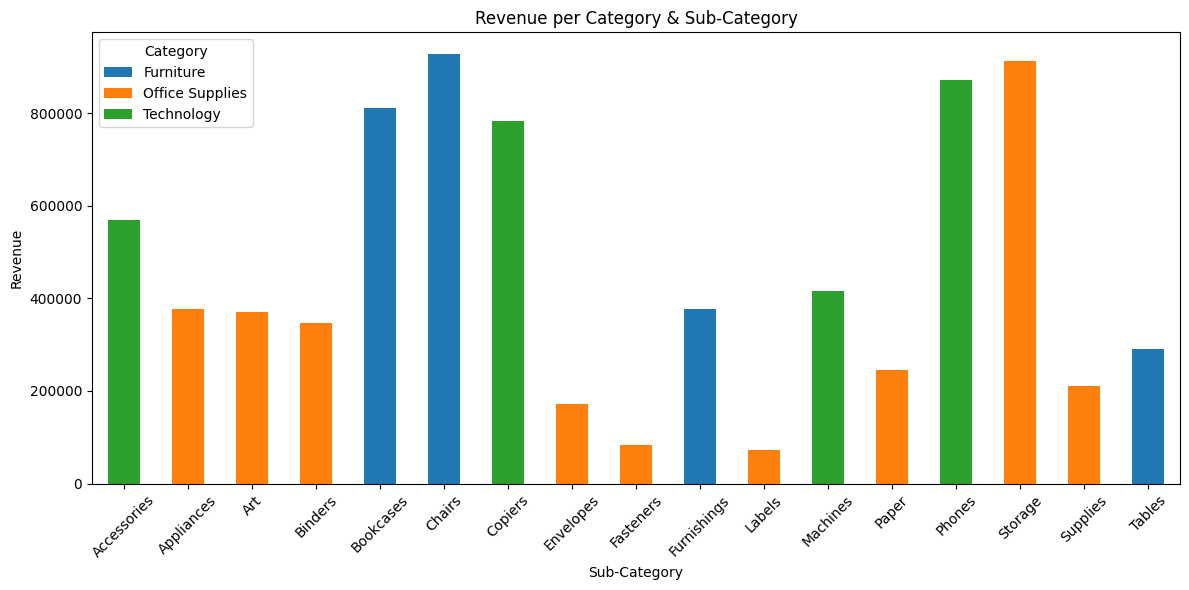

In [32]:
import matplotlib.pyplot as plt

pivot = df.groupby(["category", "sub_category"])["sales"].sum().unstack().fillna(0)

pivot.T.plot(kind="bar", stacked=True, figsize=(12,6))
plt.title("Revenue per Category & Sub-Category")
plt.ylabel("Revenue")
plt.xlabel("Sub-Category")
plt.legend(title="Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
# Total revenue per sub-category
total_subcat = df.groupby("sub_category")["sales"].sum().reset_index().sort_values(by="sales", ascending=False)

print("Total revenue per sub-category:")
print(total_subcat)

Total revenue per sub-category:
   sub_category     sales
5        Chairs  927982.0
14      Storage  913499.0
13       Phones  870518.0
4     Bookcases  811505.0
6       Copiers  782710.0
0   Accessories  570054.0
11     Machines  414983.0
1    Appliances  377590.0
9   Furnishings  377432.0
2           Art  371050.0
3       Binders  346130.0
16       Tables  289686.0
12        Paper  244307.0
15     Supplies  210069.0
7     Envelopes  170926.0
8     Fasteners   83254.0
10       Labels   73433.0


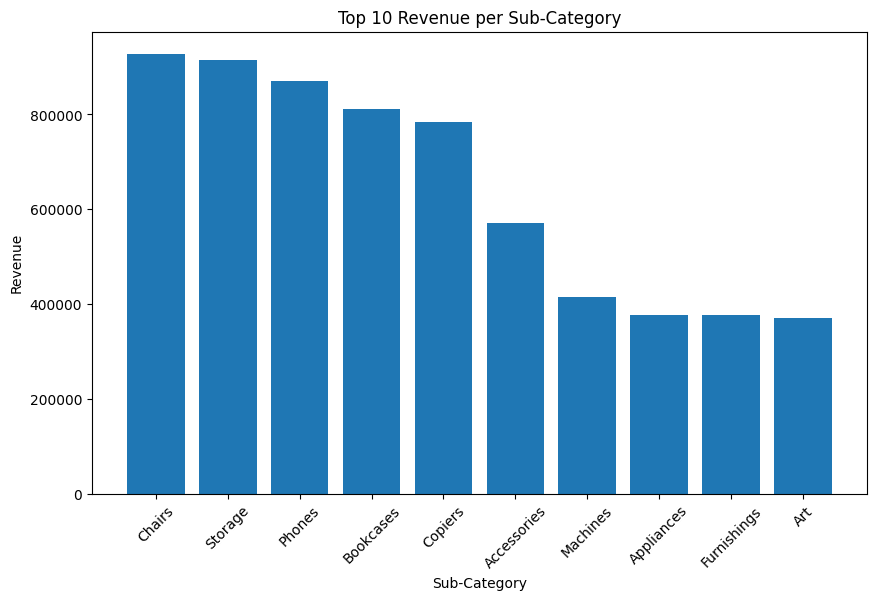

In [28]:
# Visualisasi Top 10 sub-category
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(total_subcat["sub_category"].head(10), total_subcat["sales"].head(10))
plt.title("Top 10 Revenue per Sub-Category")
plt.xlabel("Sub-Category")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

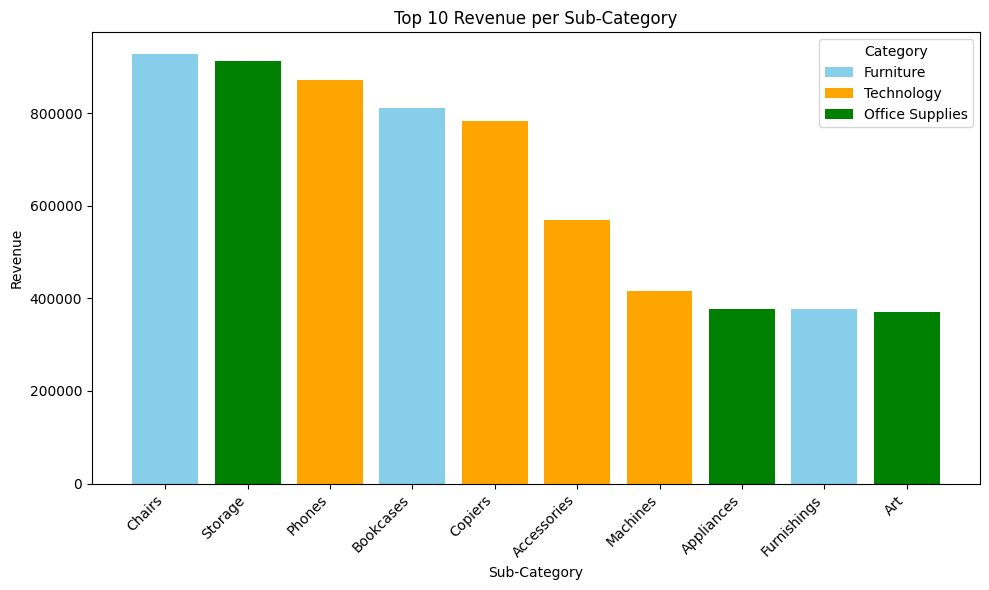

In [36]:
# Hitung total revenue per sub-category + simpan kategori
total_subcat = df.groupby(["category", "sub_category"])["sales"].sum().reset_index()

# Ambil top 10 sub-category
top10 = total_subcat.sort_values("sales", ascending=False).head(10)

# Buat mapping warna per kategori
color_map = {
    "Furniture": "skyblue",
    "Technology": "orange",
    "Office Supplies": "green"
}

# Tentukan warna sesuai kategori
colors = top10["category"].map(color_map)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(top10["sub_category"], top10["sales"], color=colors)

plt.title("Top 10 Revenue per Sub-Category")
plt.xlabel("Sub-Category")
plt.ylabel("Revenue")
plt.xticks(rotation=45, ha="right")

# Tambah legend kategori
for cat, color in color_map.items():
    plt.bar(0, 0, color=color, label=cat)  # dummy bar buat legend
plt.legend(title="Category")

plt.tight_layout()
plt.show()


In [29]:
# Revenue per Category & Sub-Category
cat_subcat = df.groupby(["category", "sub_category"])["sales"].sum().reset_index().sort_values(by="sales", ascending=False)

print("Revenue per Category & Sub-Category:")
print(cat_subcat.head(15))

Revenue per Category & Sub-Category:
           category sub_category     sales
1         Furniture       Chairs  927982.0
11  Office Supplies      Storage  913499.0
16       Technology       Phones  870518.0
0         Furniture    Bookcases  811505.0
14       Technology      Copiers  782710.0
13       Technology  Accessories  570054.0
15       Technology     Machines  414983.0
4   Office Supplies   Appliances  377590.0
2         Furniture  Furnishings  377432.0
5   Office Supplies          Art  371050.0
6   Office Supplies      Binders  346130.0
3         Furniture       Tables  289686.0
10  Office Supplies        Paper  244307.0
12  Office Supplies     Supplies  210069.0
7   Office Supplies    Envelopes  170926.0


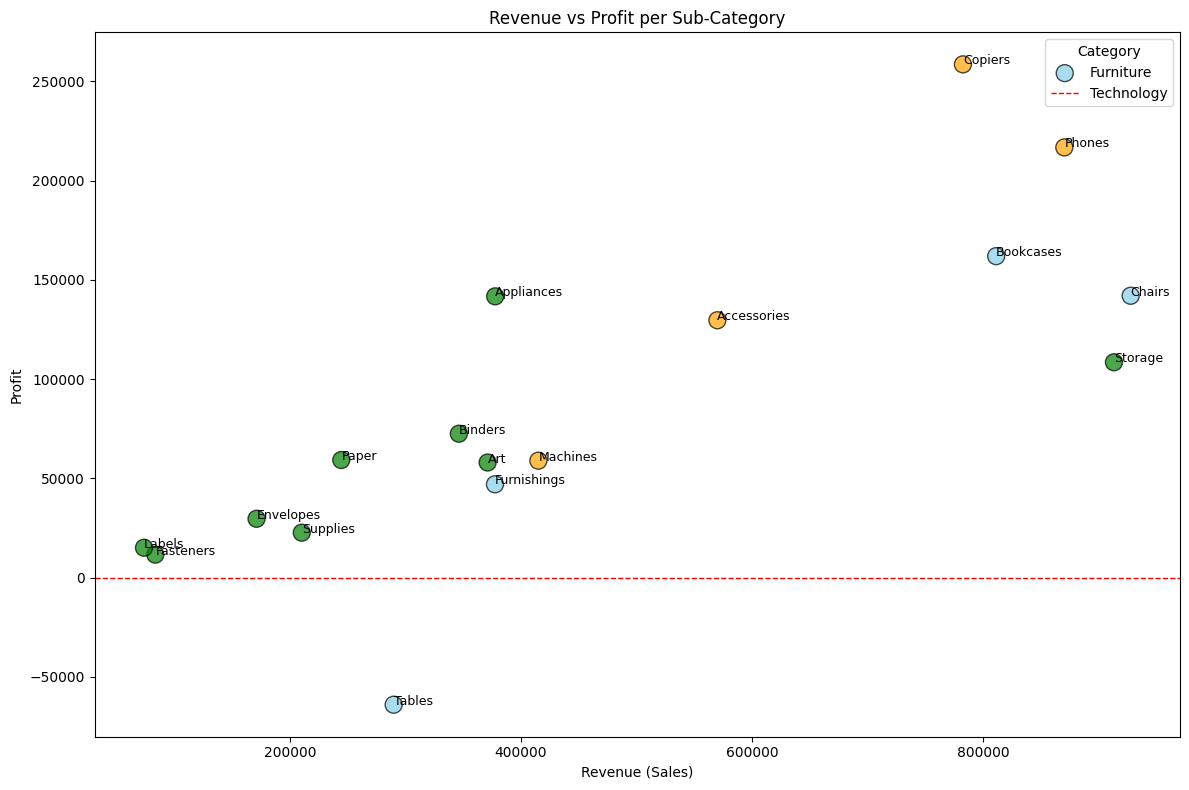

In [38]:
import matplotlib.pyplot as plt

# Hitung total revenue & profit per sub-category
subcat_analysis = df.groupby(["category", "sub_category"]).agg({
    "sales": "sum",
    "profit": "sum"
}).reset_index()

plt.figure(figsize=(12,8))

# Warna per kategori biar lebih jelas
color_map = {
    "Furniture": "skyblue",
    "Technology": "orange",
    "Office Supplies": "green"
}
colors = subcat_analysis["category"].map(color_map)

# Scatter plot
plt.scatter(
    subcat_analysis["sales"],
    subcat_analysis["profit"],
    s=150,          # ukuran bubble
    c=colors,       # warna sesuai kategori
    alpha=0.7,
    edgecolor="k"
)

# Label tiap sub-category
for i, row in subcat_analysis.iterrows():
    plt.text(row["sales"], row["profit"], row["sub_category"], fontsize=9)

# Garis nol profit (buat indikator untung vs rugi)
plt.axhline(0, color="red", linestyle="--", linewidth=1)

plt.title("Revenue vs Profit per Sub-Category")
plt.xlabel("Revenue (Sales)")
plt.ylabel("Profit")
plt.legend(color_map, title="Category")
plt.tight_layout()
plt.show()


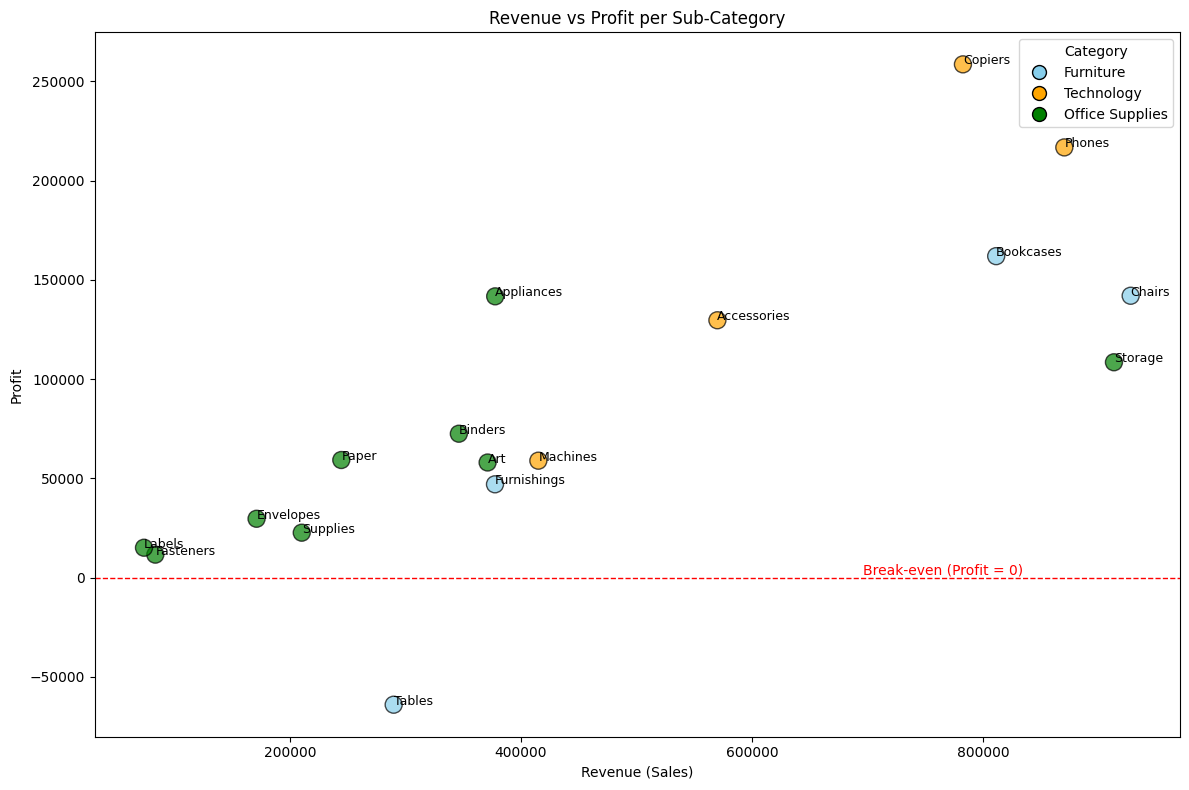

In [40]:
import matplotlib.pyplot as plt

# Hitung total revenue & profit per sub-category
subcat_analysis = df.groupby(["category", "sub_category"]).agg({
    "sales": "sum",
    "profit": "sum"
}).reset_index()

plt.figure(figsize=(12,8))

# Warna per kategori biar lebih jelas
color_map = {
    "Furniture": "skyblue",
    "Technology": "orange",
    "Office Supplies": "green"
}
colors = subcat_analysis["category"].map(color_map)

# Scatter plot
plt.scatter(
    subcat_analysis["sales"],
    subcat_analysis["profit"],
    s=150,          # ukuran bubble
    c=colors,       # warna sesuai kategori
    alpha=0.7,
    edgecolor="k"
)

# Label tiap sub-category
for i, row in subcat_analysis.iterrows():
    plt.text(row["sales"], row["profit"], row["sub_category"], fontsize=9)

# Garis nol profit (buat indikator untung vs rugi)
plt.axhline(0, color="red", linestyle="--", linewidth=1)
plt.text(subcat_analysis["sales"].max()*0.9, 0, "Break-even (Profit = 0)", 
         color="red", fontsize=10, ha="right", va="bottom")
         
plt.title("Revenue vs Profit per Sub-Category")
plt.xlabel("Revenue (Sales)")
plt.ylabel("Profit")

# Legenda kategori
handles = [plt.Line2D([0], [0], marker='o', color='w', label=cat,
                      markerfacecolor=color, markersize=10, markeredgecolor="k")
           for cat, color in color_map.items()]
plt.legend(handles=handles, title="Category")

plt.tight_layout()
plt.show()


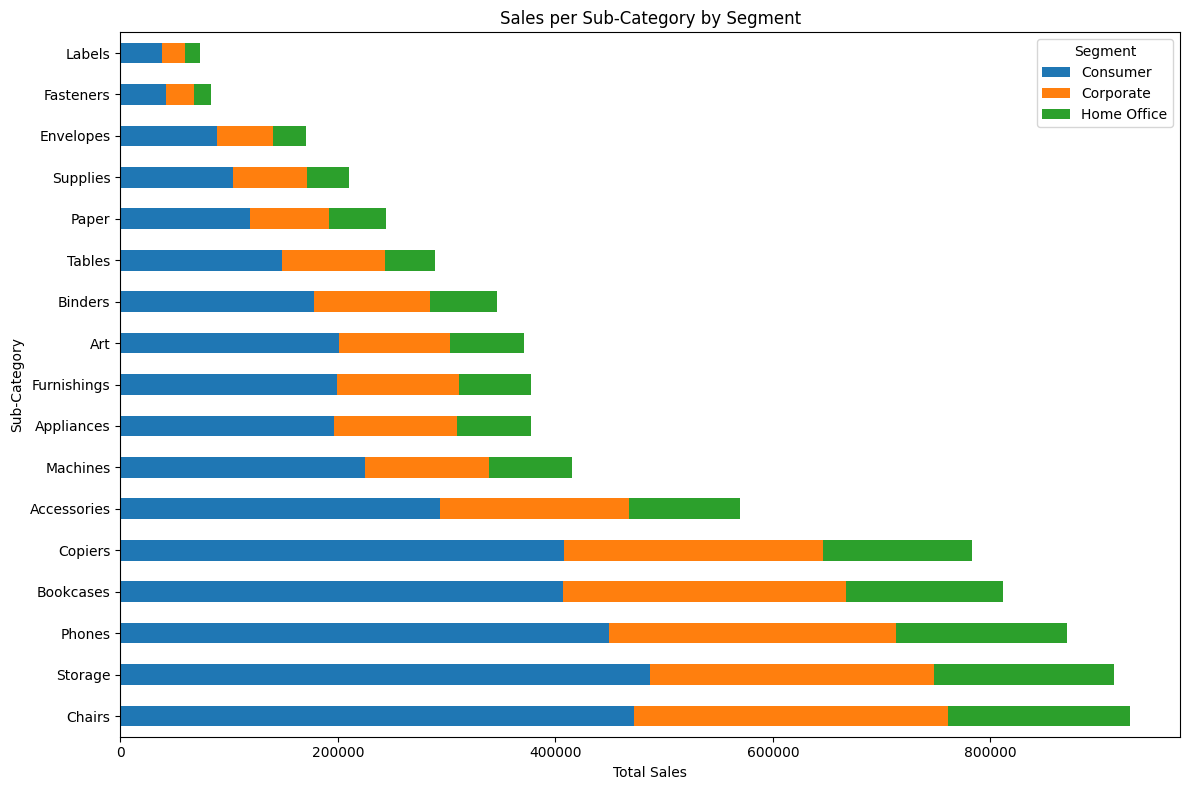

In [67]:
import matplotlib.pyplot as plt

# Hitung sales per sub-category × segment
sub_seg = df.groupby(["sub_category", "segment"])["sales"].sum().unstack().fillna(0)

# Urutkan dari total sales terbesar
sub_seg = sub_seg.loc[sub_seg.sum(axis=1).sort_values(ascending=False).index]

# Plot stacked bar horizontal
sub_seg.plot(
    kind="barh",
    figsize=(12,8),
    stacked=True
)

plt.title("Sales per Sub-Category by Segment")
plt.xlabel("Total Sales")
plt.ylabel("Sub-Category")
plt.legend(title="Segment")
plt.tight_layout()
plt.show()


In [ ]:
# Produk dengan jumlah unit terjual
total_unit_sold = df.groupby('product_name')['quantity'].sum()
total_unit_sold

product_name
"While you Were Out" Message Book, One Form per Page                                                    8
#10 Gummed Flap White Envelopes, 100/Box                                                               11
#10 Self-Seal White Envelopes                                                                          10
#10 White Business Envelopes,4 1/8 x 9 1/2                                                             32
#10- 4 1/8" x 9 1/2" Recycled Envelopes                                                                37
                                                                                                       ..
iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4    24
iOttie HLCRIO102 Car Mount                                                                             12
iOttie XL Car Mount                                                                                    14
invisibleSHIELD by ZAGG Smudge-Fr

In [ ]:
# Top 10 product by sales
top_products_qty = (
    df.groupby("product_name")["quantity"].sum()
    .reset_index()
    .sort_values("quantity", ascending=False)
    .head(10)
)
print(top_products_qty)

                               product_name  quantity
3275                                Staples       876
894               Cardinal Index Tab, Clear       337
1210          Eldon File Cart, Single Width       321
2840         Rogers File Cart, Single Width       262
3070  Sanford Pencil Sharpener, Water Color       259
3335  Stockwell Paper Clips, Assorted Sizes       253
446                  Avery Index Tab, Clear       252
1981                 Ibico Index Tab, Clear       251
3179          Smead File Cart, Single Width       250
3266  Stanley Pencil Sharpener, Water Color       242


In [45]:
# 1. Top 10 Products by Revenue
top_products_revenue = df.groupby("product_name")["sales"].sum().reset_index()
top_products_revenue = top_products_revenue.sort_values("sales", ascending=False).head(10)

# 2. Top 10 Products by Profit
top_products_profit = df.groupby("product_name")["profit"].sum().reset_index()
top_products_profit = top_products_profit.sort_values("profit", ascending=False).head(10)

# 3. Bottom 10 Products (rugi)
bottom_products_profit = df.groupby("product_name")["profit"].sum().reset_index()
bottom_products_profit = bottom_products_profit.sort_values("profit", ascending=True).head(10)

print("Top 10 Products by Revenue:")
print(top_products_revenue)

print("\nTop 10 Products by Profit:")
print(top_products_profit)

print("\nBottom 10 Products by Profit (Loss-Making):")
print(bottom_products_profit)


Top 10 Products by Revenue:
                                           product_name    sales
1210                      Eldon File Cart, Single Width  31319.0
2840                     Rogers File Cart, Single Width  22645.0
3400                      Tenex File Cart, Single Width  20778.0
3179                      Smead File Cart, Single Width  20775.0
2631  Office Star Executive Leather Armchair, Adjust...  19355.0
1420                       Fellowes Lockers, Industrial  19172.0
3193                          Smead Lockers, Industrial  18648.0
1752                        Hewlett Copy Machine, Color  16849.0
2847                               Rogers Lockers, Blue  16494.0
1422                       Fellowes Lockers, Wire Frame  16470.0

Top 10 Products by Profit:
                                           product_name      profit
866               Canon imageCLASS 2200 Advanced Copier  25199.9280
970                        Cisco Smart Phone, Full Size  17238.5206
2415                    M

In [60]:
import pandas as pd

# Ringkasan per kategori
summary_category = df.groupby("category").agg({
    "sales": "sum",
    "profit": "sum",
    "discount": "mean"
}).reset_index()

# Tambah kolom margin profit biar lebih jelas
summary_category["profit_margin (%)"] = (summary_category["profit"] / summary_category["sales"]) * 100

print(summary_category)


          category      sales        profit  discount  profit_margin (%)
0        Furniture  2406605.0  286782.25380  0.168087          11.916465
1  Office Supplies  2790258.0  518473.83430  0.137409          18.581573
2       Technology  2638265.0  663778.73318  0.135342          25.159669


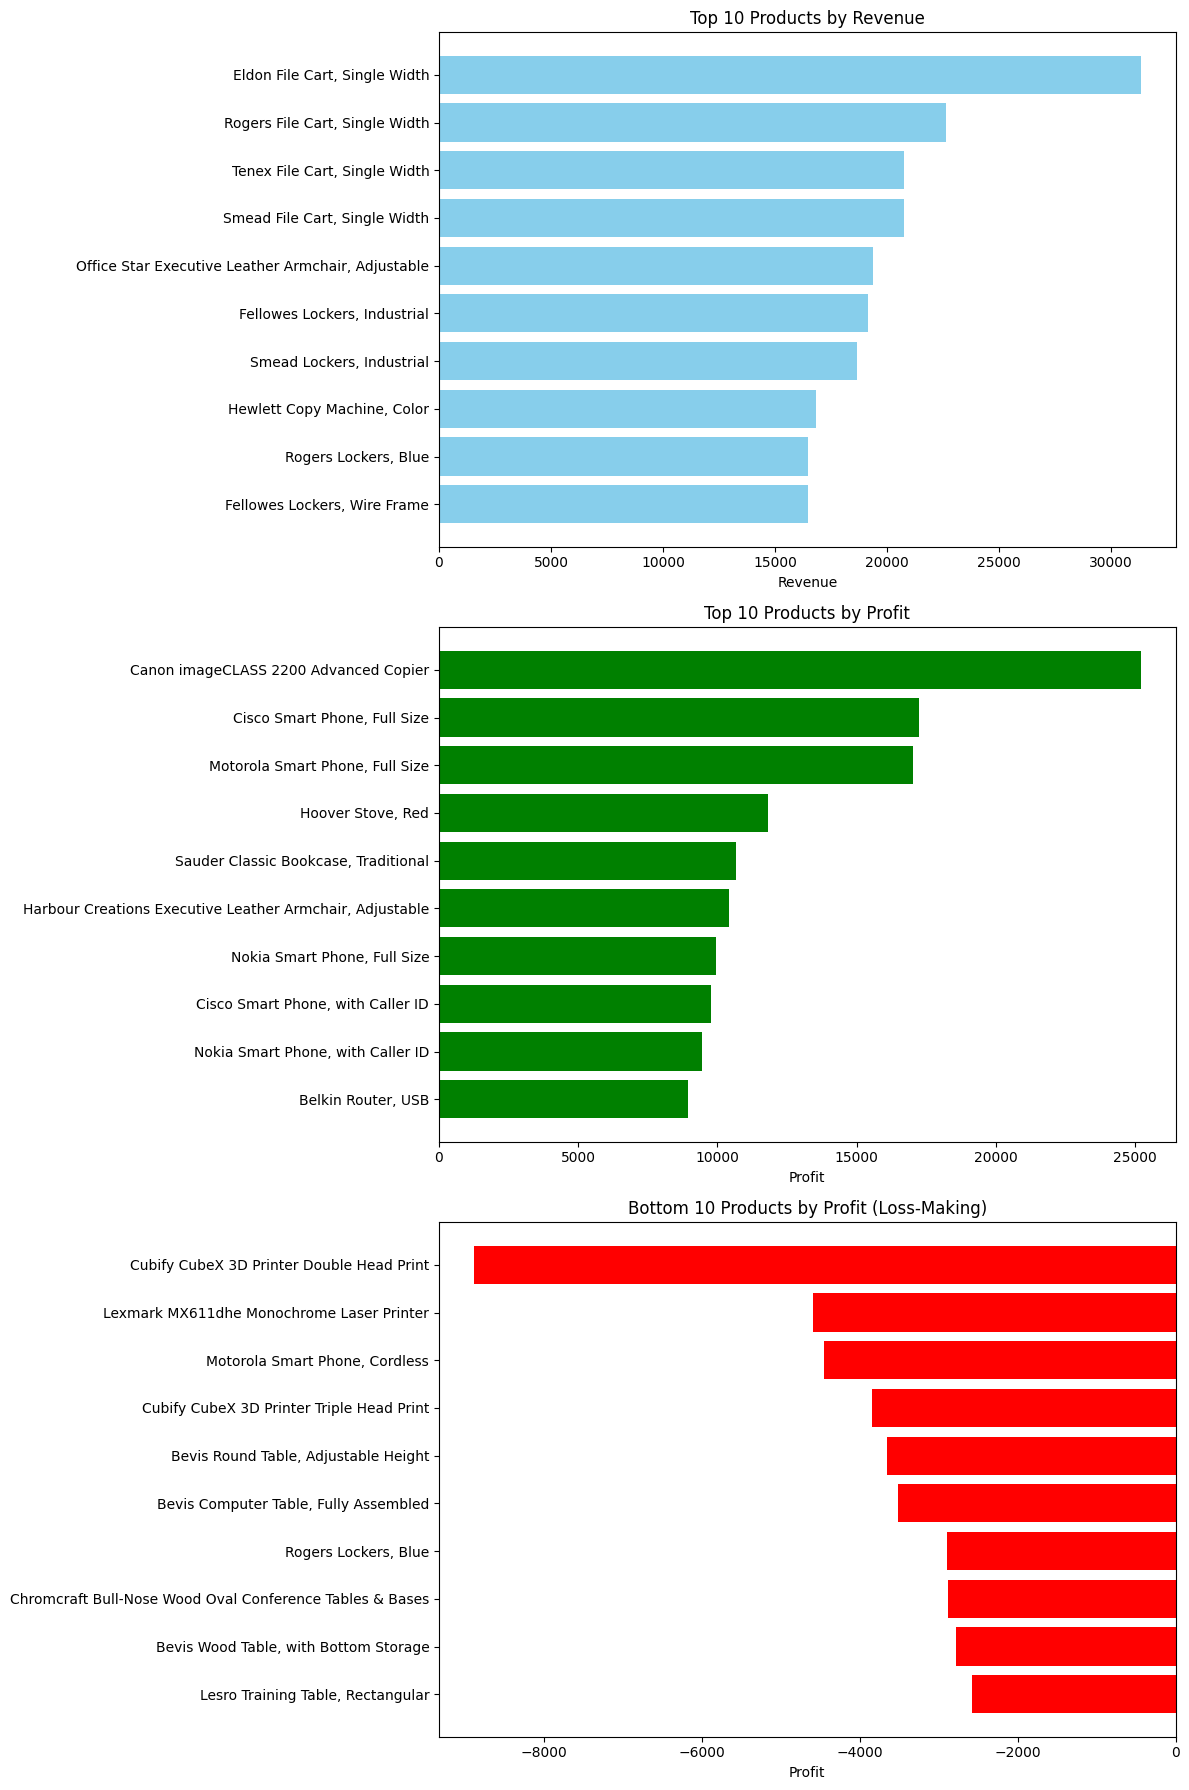

In [46]:
import matplotlib.pyplot as plt

# --- Data Preparation ---
# Top 10 Products by Revenue
top_products_revenue = (
    df.groupby("product_name")["sales"].sum()
    .reset_index()
    .sort_values("sales", ascending=False)
    .head(10)
)

# Top 10 Products by Profit
top_products_profit = (
    df.groupby("product_name")["profit"].sum()
    .reset_index()
    .sort_values("profit", ascending=False)
    .head(10)
)

# Bottom 10 Products (Loss-Making)
bottom_products_profit = (
    df.groupby("product_name")["profit"].sum()
    .reset_index()
    .sort_values("profit", ascending=True)
    .head(10)
)

# --- Visualization ---
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Top Revenue
axes[0].barh(top_products_revenue["product_name"], top_products_revenue["sales"], color="skyblue")
axes[0].set_title("Top 10 Products by Revenue")
axes[0].set_xlabel("Revenue")
axes[0].invert_yaxis()  # biar ranking tertinggi di atas

# Top Profit
axes[1].barh(top_products_profit["product_name"], top_products_profit["profit"], color="green")
axes[1].set_title("Top 10 Products by Profit")
axes[1].set_xlabel("Profit")
axes[1].invert_yaxis()

# Bottom Profit (Loss-Making)
axes[2].barh(bottom_products_profit["product_name"], bottom_products_profit["profit"], color="red")
axes[2].set_title("Bottom 10 Products by Profit (Loss-Making)")
axes[2].set_xlabel("Profit")
axes[2].invert_yaxis()

plt.tight_layout()
plt.show()


In [49]:
product_discount = df.groupby("product_name").agg({
    "discount": "mean",
    "sales": "sum",
    "profit": "sum"
}).reset_index()

# Urutkan produk dengan rata-rata diskon tertinggi
top_discounted = product_discount.sort_values("discount", ascending=False).head(10)

print("Top Discounted Products:")
print(top_discounted)


Top Discounted Products:
                                           product_name  discount  sales  \
930        Chromcraft Training Table, Adjustable Height  0.800000   38.0   
1368  Eureka Disposable Bags for Sanitaire Vibra Gro...  0.800000    2.0   
1506                     GBC Plasticlear Binding Covers  0.728571   68.0   
1526            GBC VeloBinder Electric Binding Machine  0.725000  497.0   
938                        Cisco 8961 IP Phone Charcoal  0.700000  225.0   
803   Bush Westfield Collection Bookcases, Dark Cher...  0.700000   91.0   
756   Brother MFC-9340CDW LED All-In-One Printer, Co...  0.700000  342.0   
3776  Zebra GK420t Direct Thermal/Thermal Transfer P...  0.700000  704.0   
2649                               Okidata B401 Printer  0.700000  180.0   
1783  Hewlett-Packard Deskjet F4180 All-in-One Color...  0.700000  102.0   

        profit  
930   -87.7360  
1368   -4.4660  
1506  -68.4208  
1526 -411.3320  
938  -164.9538  
803  -190.8522  
756  -319.1916  
37

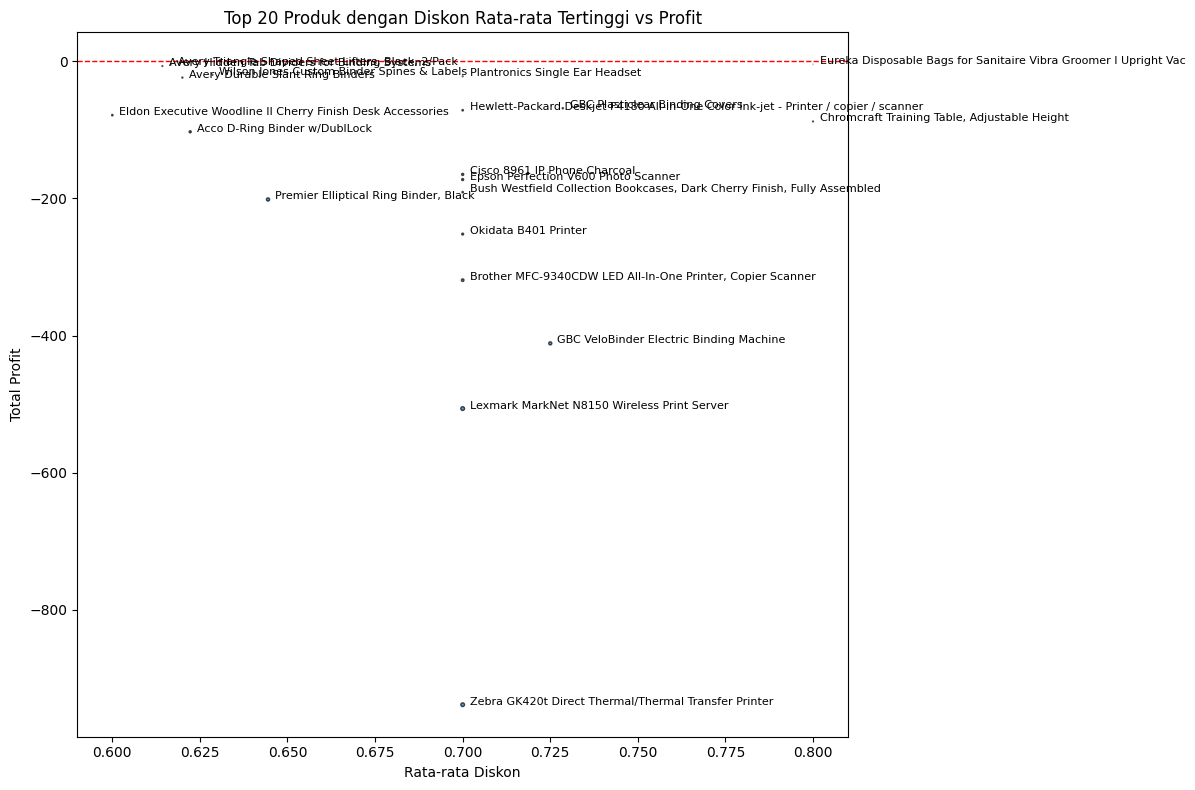

In [52]:
import matplotlib.pyplot as plt

# Agregasi data per produk
product_discount = df.groupby("product_name").agg({
    "discount": "mean",
    "sales": "sum",
    "profit": "sum"
}).reset_index()

# Ambil Top 20 produk dengan diskon rata-rata tertinggi
top_discounted = product_discount.sort_values("discount", ascending=False).head(20)

plt.figure(figsize=(12,8))

# Scatter plot diskon vs profit
plt.scatter(
    top_discounted["discount"],
    top_discounted["profit"],
    s=top_discounted["sales"]/100,  # ukuran bubble proporsional dengan revenue
    alpha=0.7,
    edgecolor="k"
)

# Label nama produk biar kelihatan
for i, row in top_discounted.iterrows():
    plt.text(
        row["discount"]+0.002,  # geser dikit biar nggak nutup titik
        row["profit"],
        row["product_name"],
        fontsize=8
    )

# Garis nol profit (indikator untung/rugi)
plt.axhline(0, color="red", linestyle="--", linewidth=1)

plt.title("Top 20 Produk dengan Diskon Rata-rata Tertinggi vs Profit")
plt.xlabel("Rata-rata Diskon")
plt.ylabel("Total Profit")
plt.tight_layout()
plt.show()


In [54]:
# Contoh: revenue produk berdasarkan segment
product_segment = (
    df.groupby(["product_name", "segment"])["sales"].sum()
    .reset_index()
    .sort_values(["product_name", "sales"], ascending=[True, False])
)

print(product_segment.head(20))

# Contoh: revenue produk berdasarkan region
product_region = (
    df.groupby(["product_name", "region"])["sales"].sum()
    .reset_index()
    .sort_values(["product_name", "sales"], ascending=[True, False])
)

print(product_region.head(20))


                                         product_name      segment  sales
0   "While you Were Out" Message Book, One Form pe...     Consumer   16.0
1   "While you Were Out" Message Book, One Form pe...    Corporate    9.0
2            #10 Gummed Flap White Envelopes, 100/Box     Consumer   25.0
3            #10 Gummed Flap White Envelopes, 100/Box    Corporate   17.0
5                       #10 Self-Seal White Envelopes    Corporate   67.0
6                       #10 Self-Seal White Envelopes  Home Office   31.0
4                       #10 Self-Seal White Envelopes     Consumer   11.0
9          #10 White Business Envelopes,4 1/8 x 9 1/2  Home Office  203.0
8          #10 White Business Envelopes,4 1/8 x 9 1/2    Corporate  157.0
7          #10 White Business Envelopes,4 1/8 x 9 1/2     Consumer  129.0
10            #10- 4 1/8" x 9 1/2" Recycled Envelopes     Consumer  123.0
12            #10- 4 1/8" x 9 1/2" Recycled Envelopes  Home Office   89.0
11            #10- 4 1/8" x 9 1/2" Rec

In [57]:
subcat_segment_region = df.groupby(
    ["category", "sub_category", "segment", "region"]
).agg({
    "sales": "sum",
    "profit": "sum",
    "discount": "mean"
}).reset_index()

# Pastikan kolomnya rata
subcat_segment_region.columns = [
    "category", "sub_category", "segment", "region", "sales", "profit", "discount"
]

print(subcat_segment_region.head())


    category sub_category   segment        region    sales     profit  \
0  Furniture    Bookcases  Consumer        Africa  30630.0   4004.067   
1  Furniture    Bookcases  Consumer        Canada   1880.0    686.820   
2  Furniture    Bookcases  Consumer     Caribbean  14103.0   1968.124   
3  Furniture    Bookcases  Consumer       Central  88843.0  10489.957   
4  Furniture    Bookcases  Consumer  Central Asia  22127.0   9566.535   

   discount  
0  0.148485  
1  0.000000  
2  0.226087  
3  0.170924  
4  0.044928  


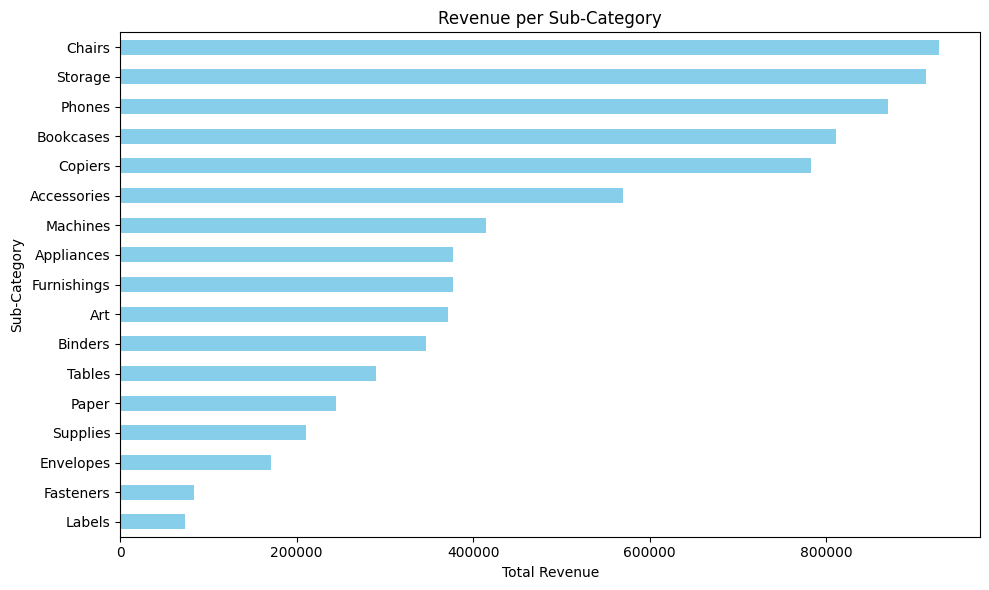

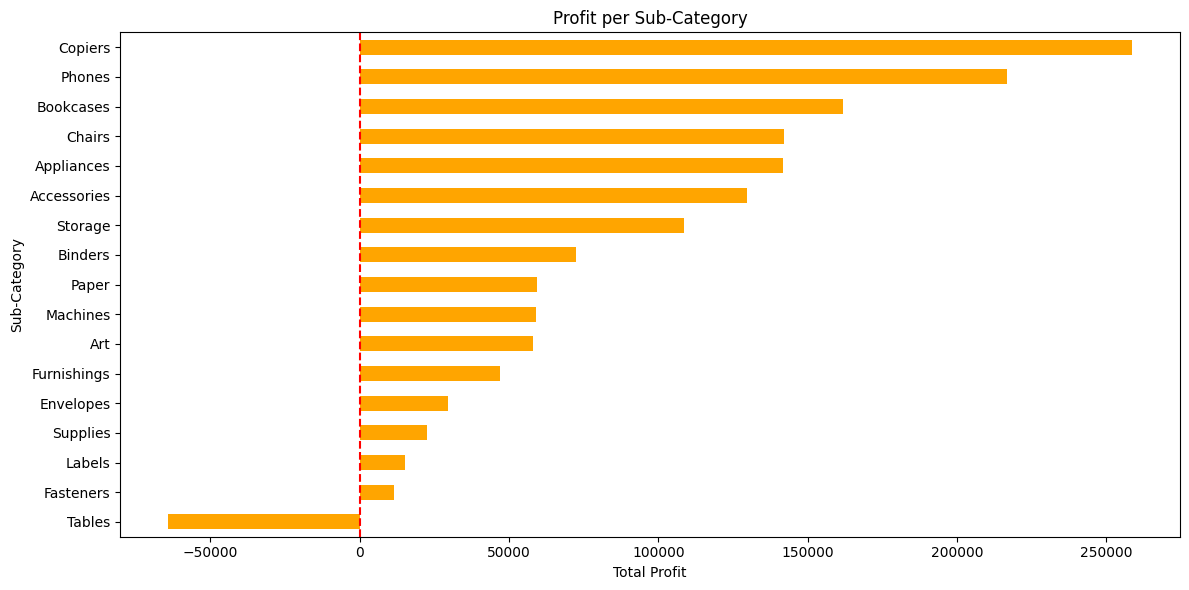

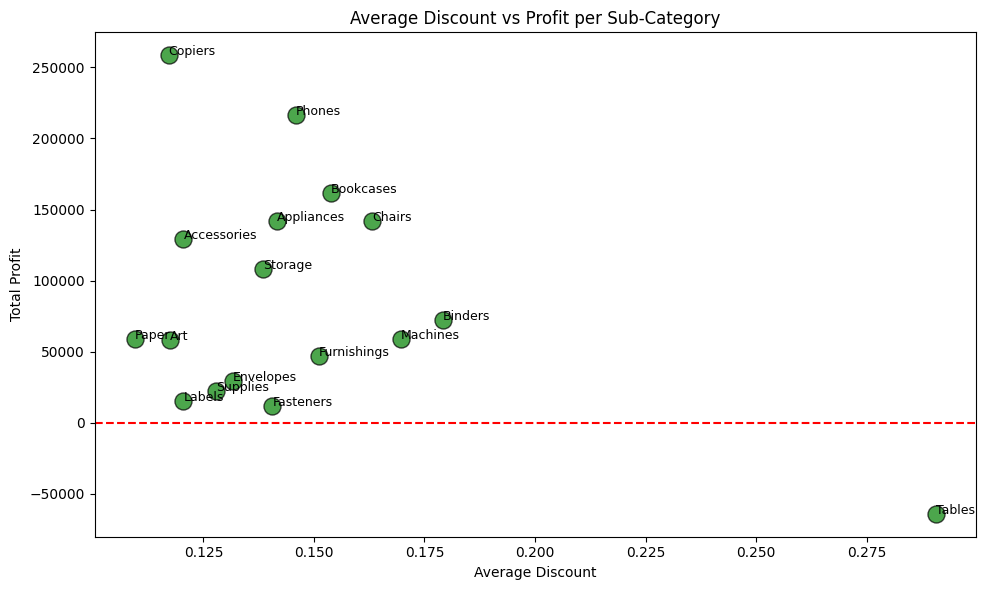

In [4]:
import matplotlib.pyplot as plt

# --- 1. Revenue per Sub-Category ---
sub_rev = df.groupby("sub_category")["sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sub_rev.plot(kind="barh", color="skyblue")
plt.title("Revenue per Sub-Category")
plt.xlabel("Total Revenue")
plt.ylabel("Sub-Category")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


# --- 2. Profit per Sub-Category ---
sub_profit = df.groupby("sub_category")["profit"].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sub_profit.plot(kind="barh", color="orange")
plt.title("Profit per Sub-Category")
plt.xlabel("Total Profit")
plt.ylabel("Sub-Category")
plt.gca().invert_yaxis()
plt.axvline(0, color="red", linestyle="--")  # garis nol → indikasi rugi/untung
plt.tight_layout()
plt.show()


# --- 3. Diskon vs Profit ---
sub_disc = df.groupby("sub_category").agg({
    "discount": "mean",
    "profit": "sum"
}).reset_index()

plt.figure(figsize=(10,6))
plt.scatter(
    sub_disc["discount"], sub_disc["profit"],
    s=150, c="green", alpha=0.7, edgecolor="k"
)

for i, row in sub_disc.iterrows():
    plt.text(row["discount"], row["profit"], row["sub_category"], fontsize=9)

plt.title("Average Discount vs Profit per Sub-Category")
plt.xlabel("Average Discount")
plt.ylabel("Total Profit")
plt.axhline(0, color="red", linestyle="--")
plt.tight_layout()
plt.show()


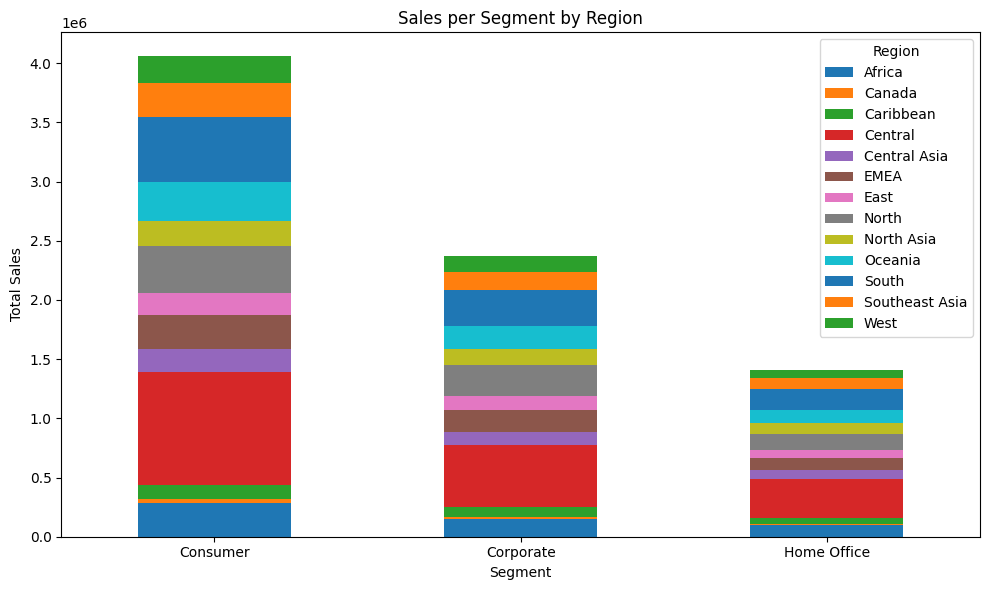

In [66]:
import matplotlib.pyplot as plt

# Hitung total sales per segment × region
seg_region = df.groupby(["segment", "region"])["sales"].sum().unstack().fillna(0)

# Plot stacked bar → tiap segment ditumpuk dengan kontribusi region
seg_region.plot(
    kind="bar",
    figsize=(10,6),
    stacked=True
)

plt.title("Sales per Segment by Region")
plt.xlabel("Segment")
plt.ylabel("Total Sales")
plt.xticks(rotation=0)
plt.legend(title="Region")
plt.tight_layout()
plt.show()


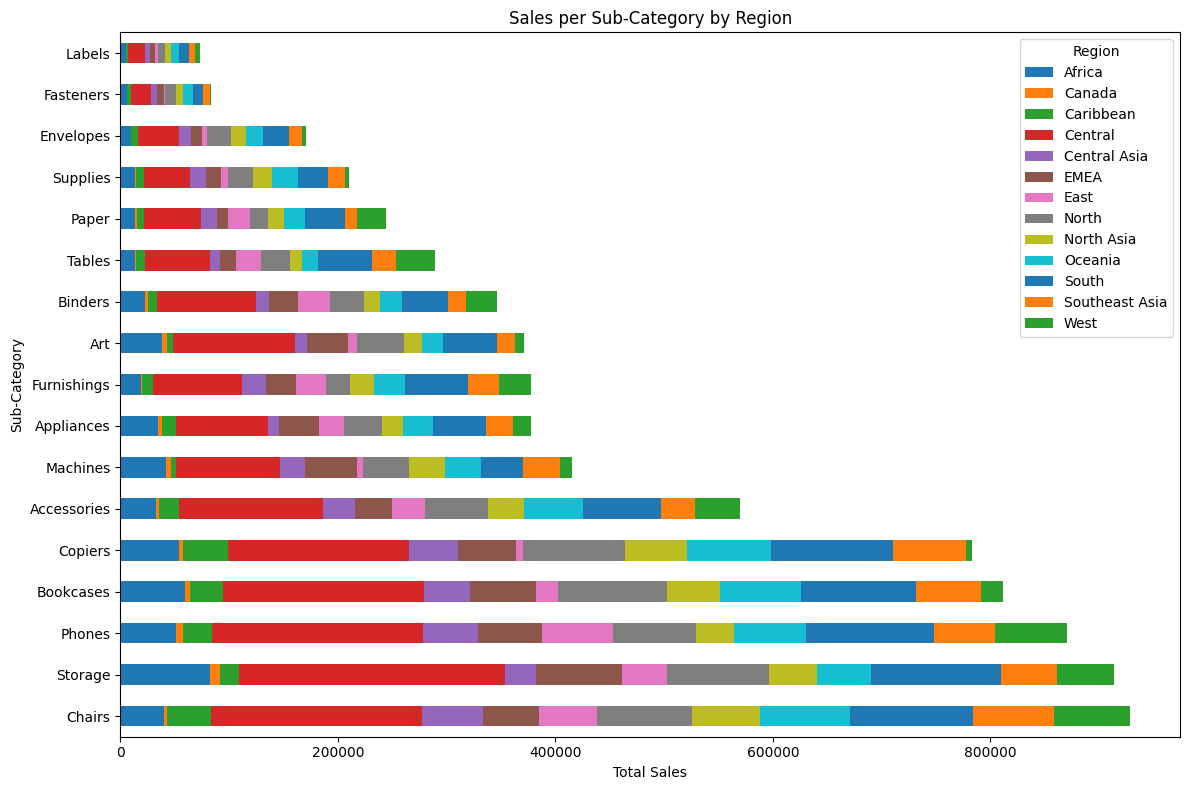

In [68]:
# Hitung sales per sub-category × region
sub_region = df.groupby(["sub_category", "region"])["sales"].sum().unstack().fillna(0)

# Urutkan dari total sales terbesar
sub_region = sub_region.loc[sub_region.sum(axis=1).sort_values(ascending=False).index]

# Plot stacked bar horizontal
sub_region.plot(
    kind="barh",
    figsize=(12,8),
    stacked=True
)

plt.title("Sales per Sub-Category by Region")
plt.xlabel("Total Sales")
plt.ylabel("Sub-Category")
plt.legend(title="Region")
plt.tight_layout()
plt.show()


In [8]:
# Pastikan kolom numerik
category_summary["sales"] = pd.to_numeric(category_summary["sales"], errors='coerce').fillna(0)
category_summary["profit"] = pd.to_numeric(category_summary["profit"], errors='coerce').fillna(0)
category_summary["discount"] = pd.to_numeric(category_summary["discount"], errors='coerce').fillna(0)

# Sekarang bisa scaling discount
discount_scaled = category_summary["discount"] * category_summary["sales"].max()


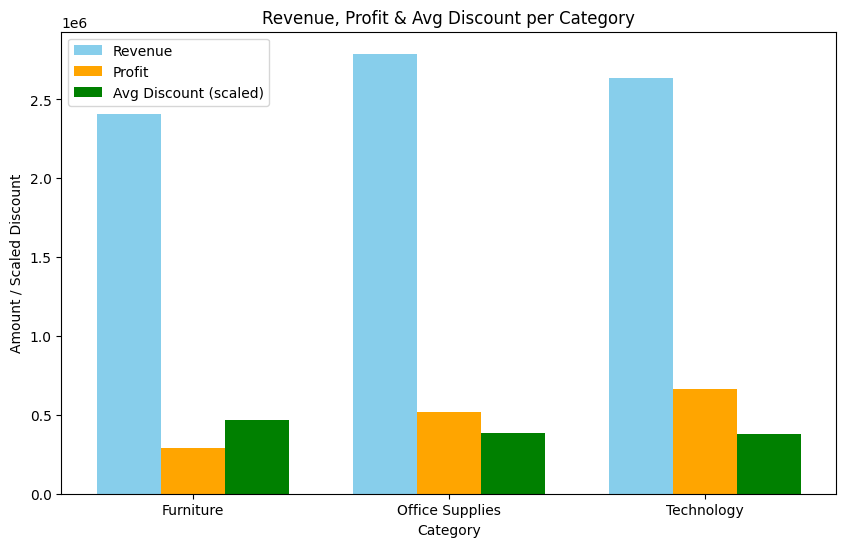

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Misal category_summary sudah ada
category_summary = df.groupby("category").agg({
    "sales": "sum",
    "profit": "sum",
    "discount": "mean"
}).reset_index().fillna(0)

categories = category_summary["category"]
x = np.arange(len(categories))
width = 0.25  # Lebar bar

# Jika discount skala kecil dibanding revenue/profit, bisa dinormalisasi
discount_scaled = category_summary["discount"] * category_summary["sales"].max()  # skala agar terlihat bar

fig, ax = plt.subplots(figsize=(10,6))

ax.bar(x - width, category_summary["sales"], width, label="Revenue", color='skyblue')
ax.bar(x, category_summary["profit"], width, label="Profit", color='orange')
ax.bar(x + width, discount_scaled, width, label="Avg Discount (scaled)", color='green')

ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.set_ylabel("Amount / Scaled Discount")
ax.set_xlabel("Category")
ax.set_title("Revenue, Profit & Avg Discount per Category")
ax.legend()

plt.show()


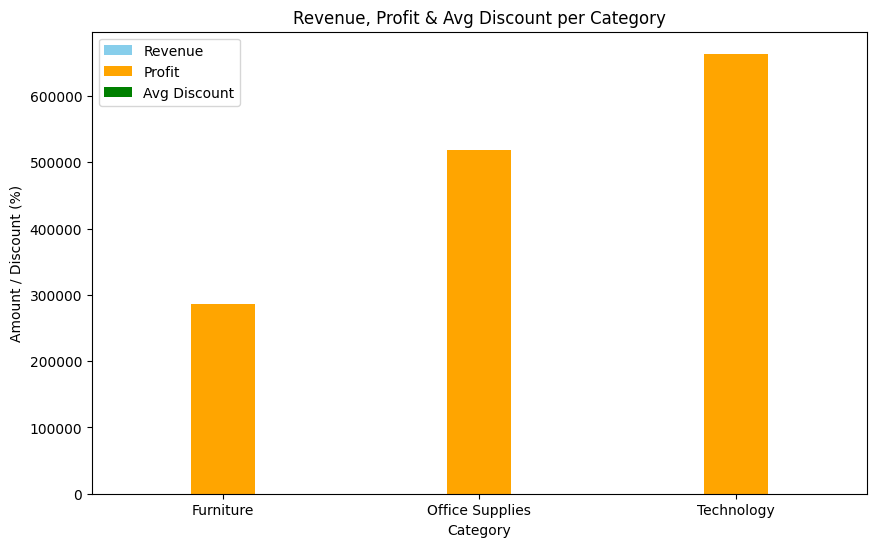

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Pastikan kolom numerik
category_summary["sales"] = pd.to_numeric(category_summary["sales"], errors='coerce').fillna(0)
category_summary["profit"] = pd.to_numeric(category_summary["profit"], errors='coerce').fillna(0)
category_summary["discount"] = pd.to_numeric(category_summary["discount"], errors='coerce').fillna(0)

categories = category_summary["category"]
x = np.arange(len(categories))
width = 0.25  # Lebar masing-masing bar

fig, ax = plt.subplots(figsize=(10,6))

# Bar berdampingan
ax.bar(x - width, category_summary["sales"], width, label="Revenue", color='skyblue')
ax.bar(x, category_summary["profit"], width, label="Profit", color='orange')
ax.bar(x + width, category_summary["discount"], width, label="Avg Discount", color='green')

# Label dan title
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.set_xlabel("Category")
ax.set_ylabel("Amount / Discount (%)")
ax.set_title("Revenue, Profit & Avg Discount per Category")
ax.legend()

plt.show()


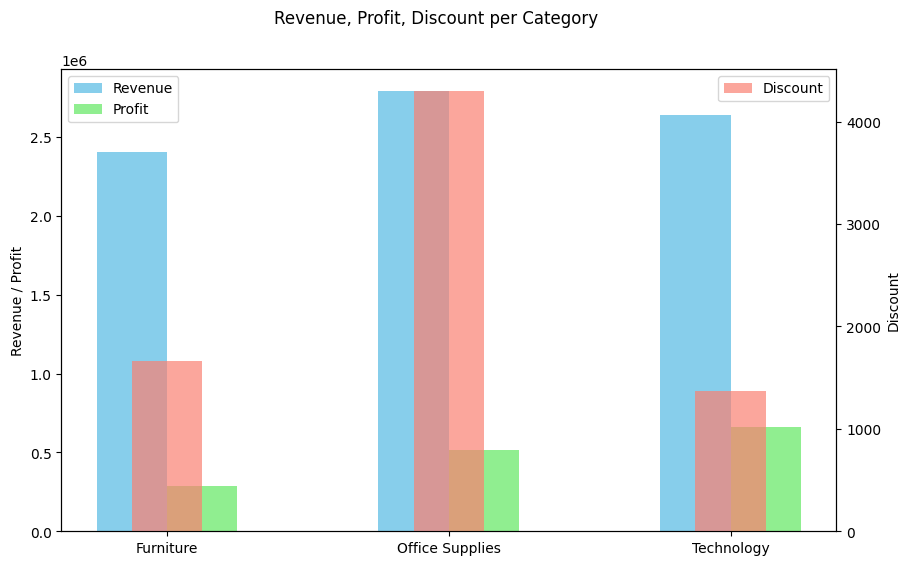

In [7]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10,6))
width = 0.25
x = range(len(category_summary))

# Bar Revenue dan Profit
ax1.bar([p - width/2 for p in x], category_summary["sales"], width=width, label="Revenue", color='skyblue')
ax1.bar([p + width/2 for p in x], category_summary["profit"], width=width, label="Profit", color='lightgreen')
ax1.set_ylabel("Revenue / Profit")
ax1.set_xticks(x)
ax1.set_xticklabels(category_summary["category"])

# Bar Discount dengan sumbu kedua
ax2 = ax1.twinx()
ax2.bar(x, category_summary["discount"], width=width, label="Discount", color='salmon', alpha=0.7)
ax2.set_ylabel("Discount")

# Judul dan legend
fig.suptitle("Revenue, Profit, Discount per Category")
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()
